In [2]:
# load dataset
import pandas as pd

loan = pd.read_csv('./loan_data.csv')
loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [4]:
# load dataset
import pandas as pd

loan = pd.read_csv('./loan_data.csv')
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
# check for missing values
import pandas as pd

loan = pd.read_csv('./loan_data.csv')
loan.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# load dataset
loan = pd.read_csv('./loan_data.csv')

# check for missing values
if loan.isna().sum().sum() == 0:
    print('No missing values')
else:
    print('There are missing values')

# split dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    loan.drop('not.fully.paid', axis=1),
    loan['not.fully.paid'],
    test_size=0.3,
    random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

No missing values


((6704, 13), (2874, 13), (6704,), (2874,))

In [8]:
import pandas as pd

# load dataset
loan = pd.read_csv('./loan_data.csv')

# check for missing values
if loan.isna().sum().sum() == 0:
    print('No missing values')
else:
    print('There are missing values')

# Convert categorical variable into dummy/indicator variables
loan = pd.get_dummies(loan, columns=['purpose'], drop_first=True)
loan.head()

No missing values


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# load dataset
loan = pd.read_csv('./loan_data.csv')

# check for missing values
if loan.isna().sum().sum() == 0:
    print('No missing values')
else:
    print('There are missing values')

# Convert categorical variable into dummy/indicator variables
loan = pd.get_dummies(loan, columns=['purpose'], drop_first=True)

# split dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    loan.drop('not.fully.paid', axis=1),
    loan['not.fully.paid'],
    test_size=0.3,
    random_state=42
)

# create a Gaussian Naive Bayes model
gnbModel = GaussianNB()
gnbModel.fit(X_train, y_train)  # train the model

# evaluate the model
train_score = gnbModel.score(X_train, y_train)  # train score for the model
test_score = gnbModel.score(X_test, y_test)  # test score for the model
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')

No missing values
Train score: 0.823538186157518
Test score: 0.8180236604036186


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score

# load dataset
loan = pd.read_csv('./loan_data.csv')

# check for missing values
if loan.isna().sum().sum() == 0:
    print('No missing values')
else:
    print('There are missing values')

# Convert categorical variable into dummy/indicator variables
loan = pd.get_dummies(loan, columns=['purpose'], drop_first=True)

# split dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    loan.drop('not.fully.paid', axis=1),
    loan['not.fully.paid'],
    test_size=0.3,
    random_state=13
)

# create a Gaussian Naive Bayes model
gnbModel = GaussianNB()
gnbModel.fit(X_train, y_train)  # train the model

# make predictions
y_pred = gnbModel.predict(X_test)

# evaluate the model
train_score = gnbModel.score(X_train, y_train)  # train score for the model
test_score = gnbModel.score(X_test, y_test)  # test score for the model
accuracy_score_value = accuracy_score(y_test, y_pred)
f1_score_value = f1_score(y_pred, y_test, average='weighted')

print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
print(f'Accuracy score: {accuracy_score_value}')
print(f'F1 score: {f1_score_value}')

No missing values
Train score: 0.818019093078759
Test score: 0.8357689631176062
Accuracy score: 0.8357689631176062
F1 score: 0.8787570646140306


No missing values
Train score: 0.818019093078759
Test score: 0.8357689631176062
Accuracy score: 0.8357689631176062
F1 score: 0.8787570646140306


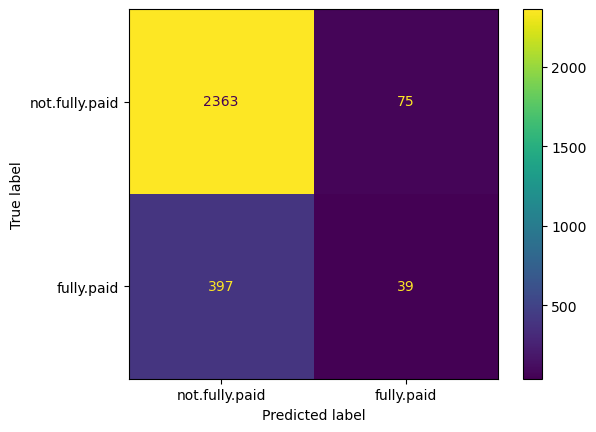

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# load dataset
loan = pd.read_csv('./loan_data.csv')

# check for missing values
if loan.isna().sum().sum() == 0:
    print('No missing values')
else:
    print('There are missing values')

# Convert categorical variable into dummy/indicator variables
loan = pd.get_dummies(loan, columns=['purpose'], drop_first=True)

# split dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    loan.drop('not.fully.paid', axis=1),
    loan['not.fully.paid'],
    test_size=0.3,
    random_state=13
)

# create a Gaussian Naive Bayes model
gnbModel = GaussianNB()
gnbModel.fit(X_train, y_train)  # train the model

# make predictions
y_pred = gnbModel.predict(X_test)

# evaluate the model
train_score = gnbModel.score(X_train, y_train)  # train score for the model
test_score = gnbModel.score(X_test, y_test)  # test score for the model
accuracy_score_value = accuracy_score(y_test, y_pred)
f1_score_value = f1_score(y_pred, y_test, average='weighted')

print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
print(f'Accuracy score: {accuracy_score_value}')
print(f'F1 score: {f1_score_value}')

# plot confusion matrix
labels = ['not.fully.paid', 'fully.paid']
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

Train score: 0.6724343675417661
Test score: 0.6784968684759917
Accuracy score: 0.6784968684759917
F1 score: 0.6477587829551295


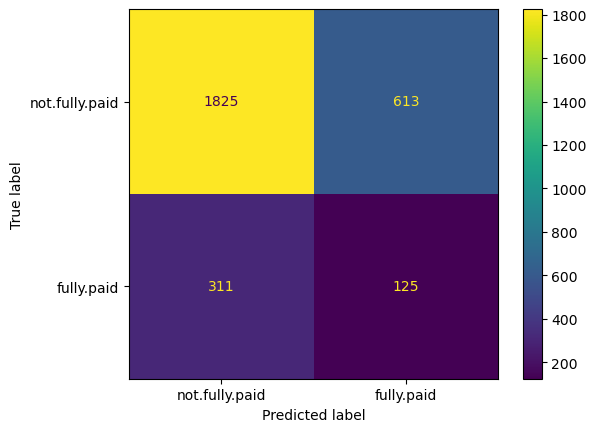

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# load dataset
loan = pd.read_csv('./loan_data.csv')

# Convert categorical variable into dummy/indicator variables
loan = pd.get_dummies(loan, columns=['purpose'], drop_first=True)

# split dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    loan.drop('not.fully.paid', axis=1),
    loan['not.fully.paid'],
    test_size=0.3,
    random_state=13
)

# create a Multinomial Naive Bayes model
gnbModel = MultinomialNB()
gnbModel.fit(X_train, y_train)  # train the model

# make predictions
y_pred = gnbModel.predict(X_test)

# evaluate the model
train_score = gnbModel.score(X_train, y_train)  # train score for the model
test_score = gnbModel.score(X_test, y_test)  # test score for the model
accuracy_score_value = accuracy_score(y_test, y_pred)
f1_score_value = f1_score(y_pred, y_test, average='weighted')

print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
print(f'Accuracy score: {accuracy_score_value}')
print(f'F1 score: {f1_score_value}')

# plot confusion matrix
labels = ['not.fully.paid', 'fully.paid']
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

Train score: 0.6721360381861575
Test score: 0.6788448155880307
Accuracy score: 0.6788448155880307
F1 score: 0.6480759222278866


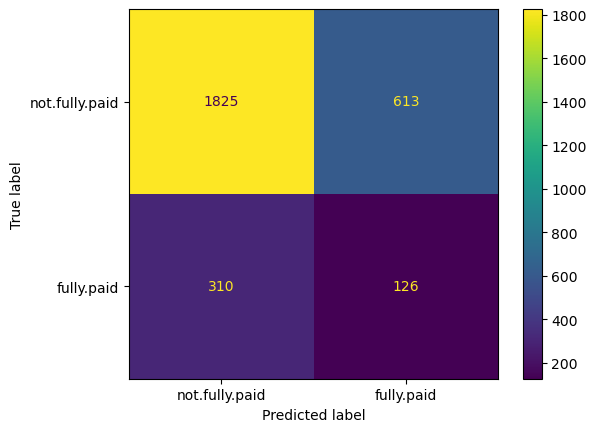

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# load dataset
loan = pd.read_csv('./loan_data.csv')

# Convert categorical variable into dummy/indicator variables
loan = pd.get_dummies(loan, columns=['purpose'], drop_first=True)

# split dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    loan.drop('not.fully.paid', axis=1),
    loan['not.fully.paid'],
    test_size=0.3,
    random_state=13
)

# create a Complement Naive Bayes model
gnbModel = ComplementNB()
gnbModel.fit(X_train, y_train)  # train the model

# make predictions
y_pred = gnbModel.predict(X_test)

# evaluate the model
train_score = gnbModel.score(X_train, y_train)  # train score for the model
test_score = gnbModel.score(X_test, y_test)  # test score for the model
accuracy_score_value = accuracy_score(y_test, y_pred)
f1_score_value = f1_score(y_pred, y_test, average='weighted')

print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
print(f'Accuracy score: {accuracy_score_value}')
print(f'F1 score: {f1_score_value}')

# plot confusion matrix
labels = ['not.fully.paid', 'fully.paid']
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

Train score: 0.8360680190930787
Test score: 0.8451635351426583
Accuracy score: 0.8451635351426583
F1 score: 0.9029076333481387


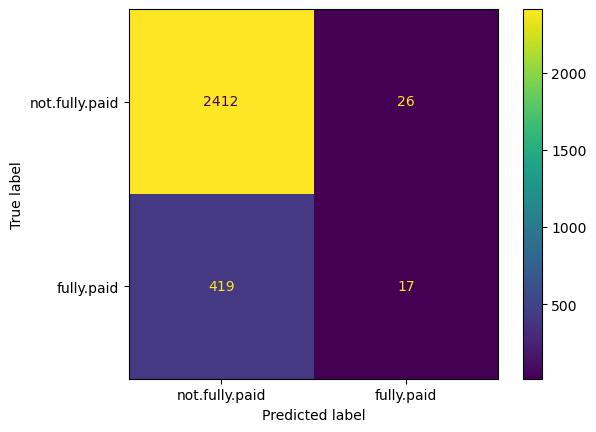

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# load dataset
loan = pd.read_csv('./loan_data.csv')

# Convert categorical variable into dummy/indicator variables
loan = pd.get_dummies(loan, columns=['purpose'], drop_first=True)

# split dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    loan.drop('not.fully.paid', axis=1),
    loan['not.fully.paid'],
    test_size=0.3,
    random_state=13
)

# create a Bernoulli Naive Bayes model
gnbModel = BernoulliNB()
gnbModel.fit(X_train, y_train)  # train the model

# make predictions
y_pred = gnbModel.predict(X_test)

# evaluate the model
train_score = gnbModel.score(X_train, y_train)  # train score for the model
test_score = gnbModel.score(X_test, y_test)  # test score for the model
accuracy_score_value = accuracy_score(y_test, y_pred)
f1_score_value = f1_score(y_pred, y_test, average='weighted')

print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
print(f'Accuracy score: {accuracy_score_value}')
print(f'F1 score: {f1_score_value}')

# plot confusion matrix
labels = ['not.fully.paid', 'fully.paid']
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()